In [9]:
import os
from dotenv import load_dotenv
import requests
import time
from datetime import date
import json
import csv
import pandas as pd
import warnings
import matplotlib.pyplot as plt

In [12]:
#Load TOKEN
load_dotenv()
cryptocompare_api_key=os.getenv('API-COMPARE-KEY')
print(cryptocompare_api_key)

49d53ac0352cae940694e0e4b0eb807f7106b6d1c192b541baff047f09941aa9


In [11]:
TODAY = str(date.today())
MY_CRYPTO_CURRENCIES = ["BTC","MANA","ETH","LTC","ALGO","SHIB","MANA"] 

In [45]:
def get_prices(token):
    url = "https://min-api.cryptocompare.com/data/v2/histoday?fsym="+token+"&tsym=USD&limit=1000&api_key="
    response = requests.get(url+cryptocompare_api_key)
    my_dict = response.json()
    dictionary = my_dict['Data']
    
    columns = ['Date','Value']
    rows = []
    
    for entries in dictionary['Data']:
        epoch = entries['time']
        date = time.strftime('%m/%d/%Y',time.localtime(epoch))
        closing_price = entries['close']
        rows.append((date,closing_price))
    
    filename = '/Users/rebecaangulorojas/Dropbox/Mi Mac (Rebeca’s MacBook Air)/Documents/Trabajo/DFiBot/Crypto-data-mining/data/'+token+'.csv'
    with open(filename,'w') as csvfile:
        csvwriter = csv.writer(csvfile)
        csvwriter.writerow(columns)
        csvwriter.writerows(rows)

In [46]:
get_prices("BTC") # guardamos BTC y MANA
get_prices("MANA")

/Users/rebecaangulorojas/opt/miniconda3/envs/Mineros/lib/python3.8/site-packages/cryptography/hazmat/backends/openssl/x509.py:14: CryptographyDeprecationWarning: This version of cryptography contains a temporary pyOpenSSL fallback path. Upgrade pyOpenSSL now.
  warnings.warn(


# Lectura de Dataframes

In [47]:
btc_df = pd.read_csv('data/BTC.csv')
mana_df = pd.read_csv('data/MANA.csv')

In [48]:
btc_df['Date'] = pd.to_datetime(btc_df['Date'])
btc_df = btc_df.sort_values('Date',ascending=True)

mana_df['Date'] = pd.to_datetime(mana_df['Date'])
mana_df = mana_df.sort_values('Date',ascending=True)

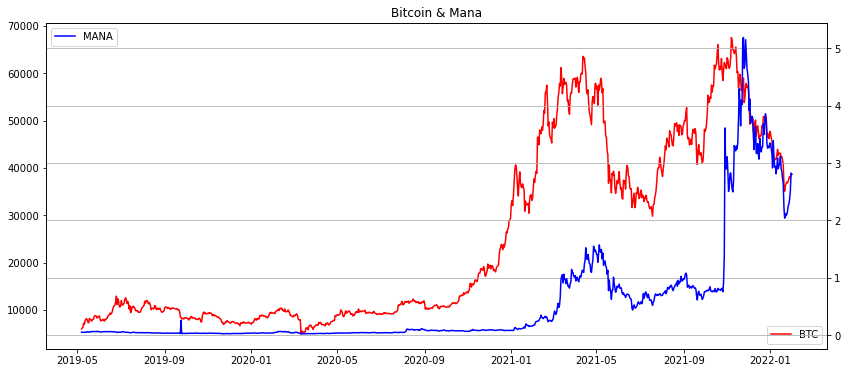

In [137]:
fig, ax = plt.subplots(figsize=(14,6))
plt.title('Bitcoin'+' & '+ 'Mana')

ax.plot(btc_df['Date'],btc_df['Value'],color='red',label='BTC')
ax.legend(loc = 'lower right')
ax2 = ax.twinx()
plt.plot(mana_df['Date'],mana_df['Value'],color='blue',label='MANA')
ax2.legend(loc='upper left')
plt.grid(True)
plt.show()

In [80]:
# btc
DSR_btc =btc_df['Value'].pct_change(1).to_frame()
DSR_btc.rename(columns = {'Value':'BTC-percChange'}, inplace = True)

# mana
DSR_mana =mana_df['Value'].pct_change(1).to_frame()
DSR_mana.rename(columns = {'Value':'MANA-percChange'}, inplace = True)

In [125]:
ETL_table = pd.concat([btc_df, DSR_btc, DSR_mana], axis=1)

DSR = ETL_table[['BTC-percChange','MANA-percChange']]

In [126]:
print("maximo de Mana", ETL_table['MANA-percChange'].max(), " \n ",
      ETL_table.iloc[ETL_table['MANA-percChange'].idxmax()])

maximo de Mana 8.826789838337184  
  Date               2019-09-24 00:00:00
Value                          8446.97
BTC-percChange               -0.011188
MANA-percChange                8.82679
Name: 140, dtype: object


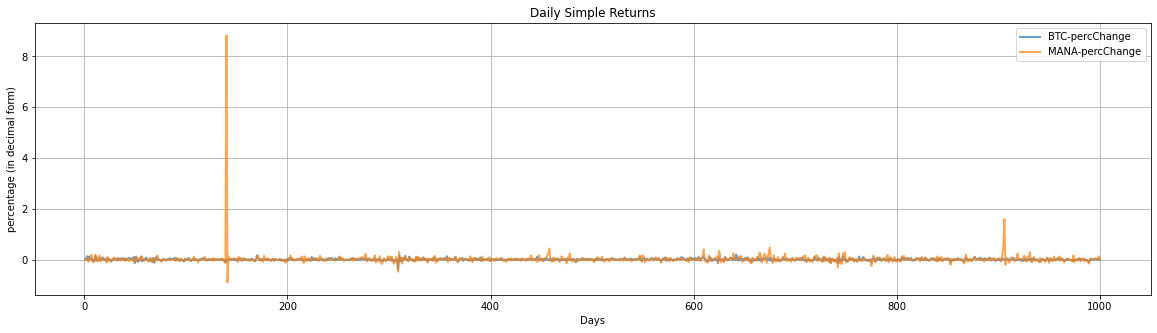

In [136]:
# Visualize the daily simple returns
plt.figure(figsize=(20,5))

for c in DSR.columns.values:
    plt.plot(DSR.index,DSR[c], label = c,lw=2, alpha=0.7)
plt.grid(True)
plt.title("Daily Simple Returns")
plt.ylabel("percentage (in decimal form)")
plt.xlabel("Days")
plt.legend(DSR.columns.values, loc = "upper right")
plt.show()

In [128]:
# Get Volatility
print("Cryptocurrency Volatility")
DSR.std()

Cryptocurrency Volatility


BTC-percChange     0.040378
MANA-percChange    0.295448
dtype: float64

In [129]:
# Show the mean daily simple return
DSR.mean()

BTC-percChange     0.002700
MANA-percChange    0.015659
dtype: float64

In [130]:
# Correlation
DSR.corr()

,BTC-percChange,MANA-percChange
BTC-percChange,1.000000,0.127762
MANA-percChange,0.127762,1.000000


<AxesSubplot:>

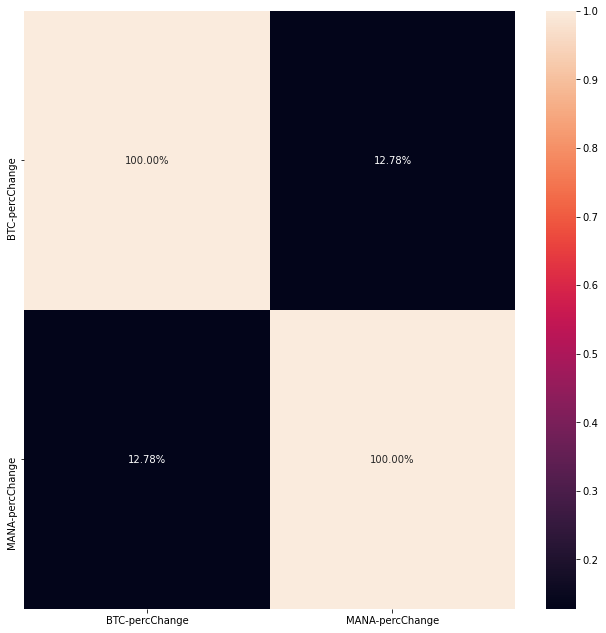

In [131]:
# Visualize the correlation
import seaborn as sns

plt.subplots(figsize=(11,11))
sns.heatmap(DSR.corr(),annot=True,fmt='.2%')

In [133]:
# Get the daily cumulative simple returns
DCSR = (DSR + 1).cumprod()

DCSR

,BTC-percChange,MANA-percChange
0,NaN,NaN
1,1.028881,0.970473
2,1.059943,0.968821
3,1.198818,1.039438
4,1.163188,0.949824
...,...,...
996,6.292136,47.160851
997,6.365512,48.977906
998,6.319432,51.744786
999,6.417156,58.310964


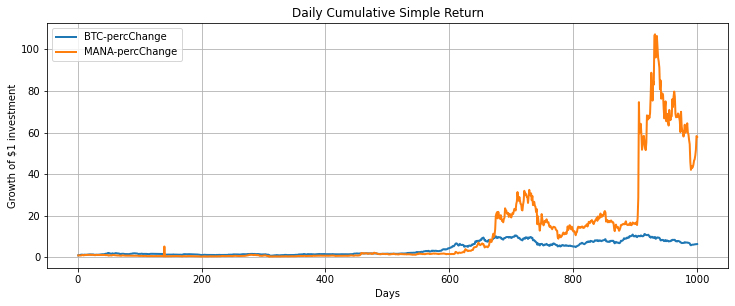

In [135]:
# Visualize the daily cumulative simple returns
plt.figure(figsize=(12.2,4.5))
for c in DCSR.columns.values:
    plt.plot(DCSR.index,DCSR[c],lw=2,label=c)

plt.title("Daily Cumulative Simple Return")
plt.xlabel("Days")
plt.ylabel("Growth of $1 investment")
plt.legend(DCSR.columns.values, loc = 'upper left', fontsize=10)
plt.grid(True)
plt.show()